In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
data = pd.read_csv('CreditCard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Data Preprocessing 
# step 1 : check missing data 
# there is no missing data found. 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# step 2 : Encoding concept 
# a) Label encoder : char to number
# b) One hot encoder : split data into variables basis binary value
# c) Dummy variables : to avoid multicollinearity problem

# Since there is no char variable, so no need to do encoding part

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# step 3 : Outlier treatment
# since it's classification problem and also most of the variable value fall between 0 and 1
# this is also credit card (anomaly detection problem) so better to ignore outlier part

In [7]:
# step 5 : check imbalance dataset
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

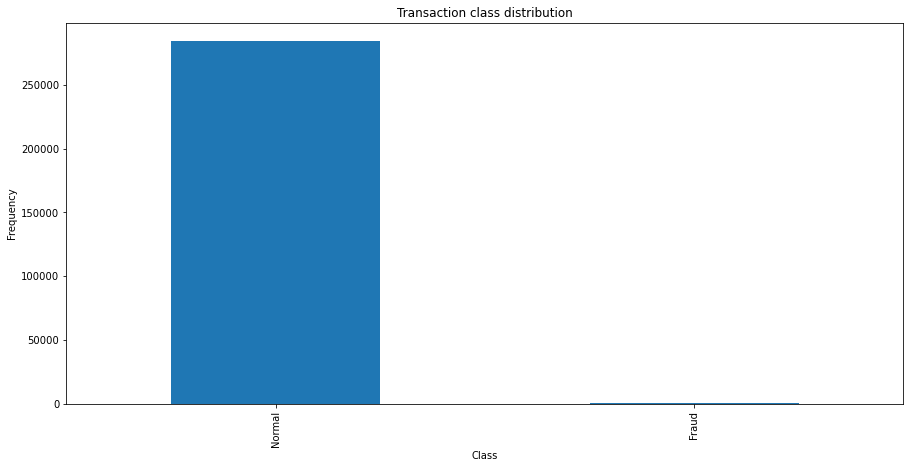

In [8]:
plt.figure(figsize=(15,7))
count_classes = pd.value_counts(data['Class'])
count_classes.plot(kind = 'bar')
plt.title("Transaction class distribution")
plt.xticks(range(2),['Normal','Fraud'])
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [9]:
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

print(fraud.shape, normal.shape)

(492, 31) (284315, 31)


In [10]:

normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

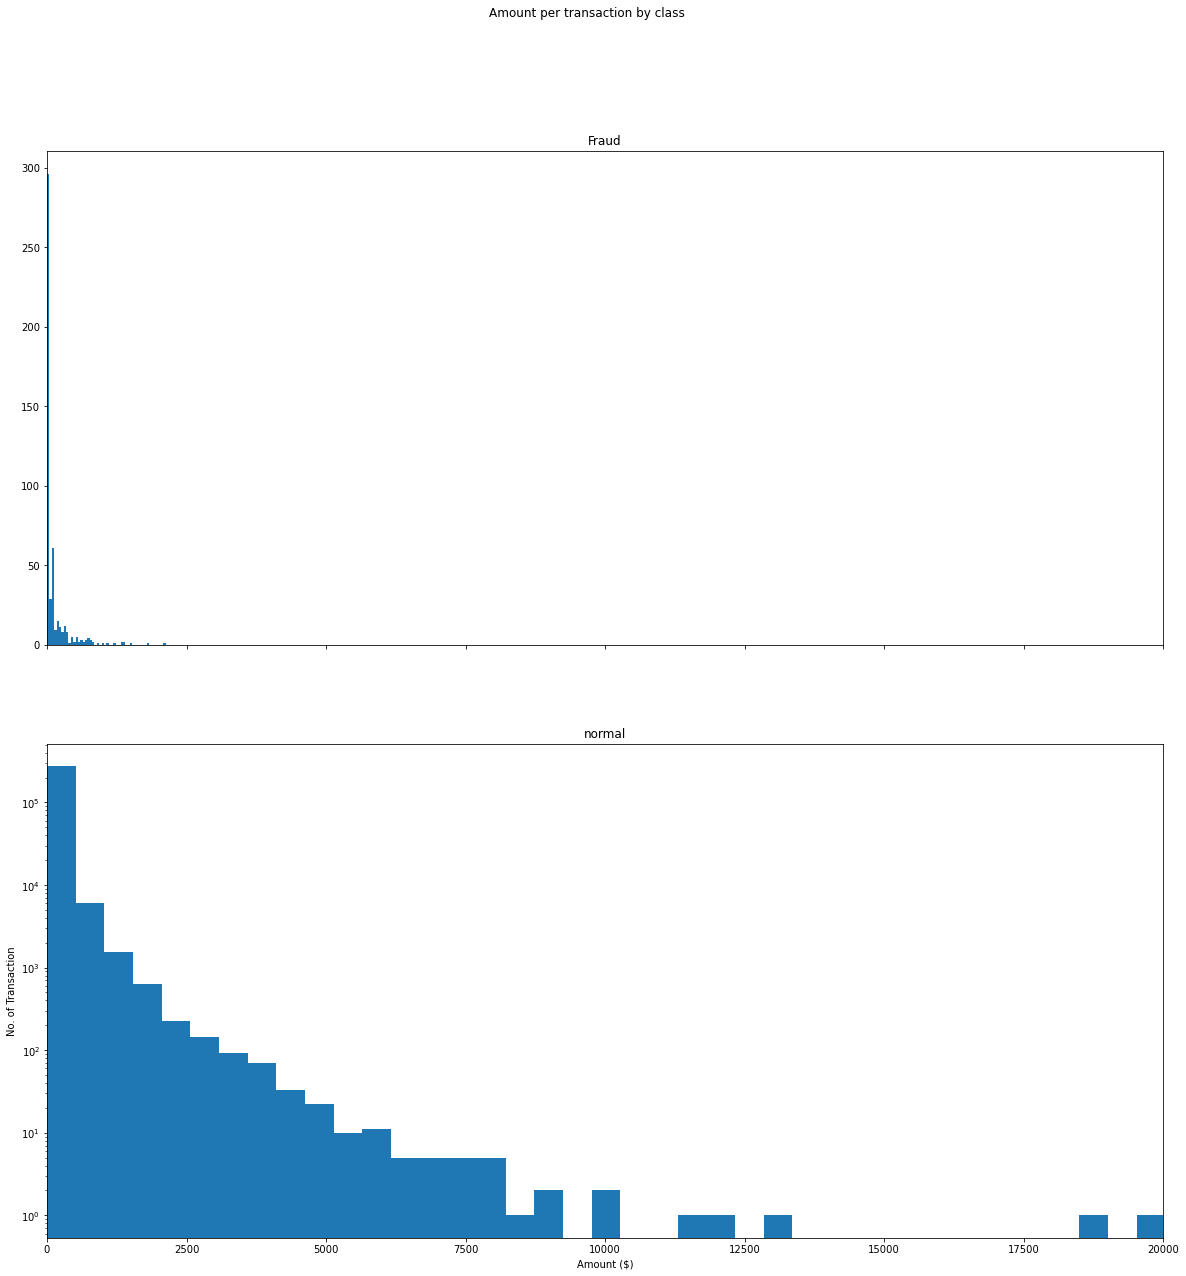

In [12]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20),sharex = True)
f.suptitle("Amount per transaction by class")
bins = 50
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins=bins)
ax2.set_title('normal')

plt.xlabel("Amount ($)")
plt.ylabel("No. of Transaction")

plt.xlim(0,20000)
plt.yscale('log')
plt.show()

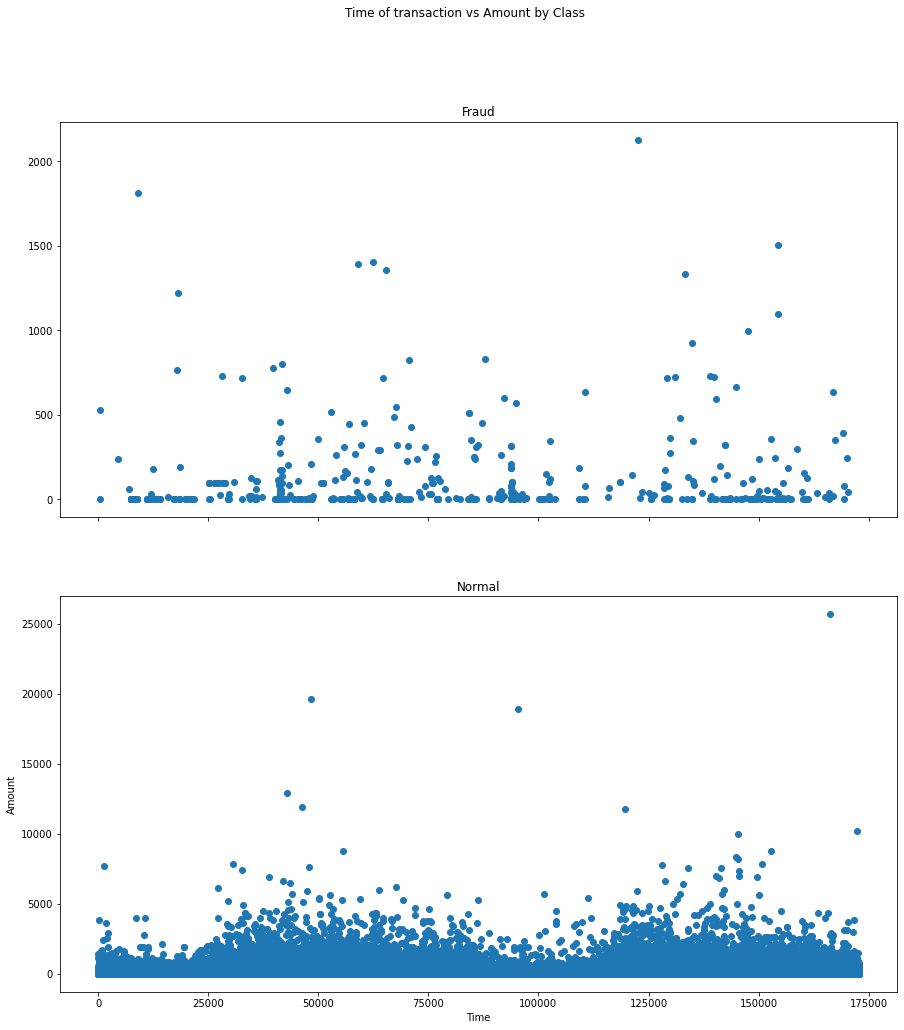

In [13]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(15,16),sharex = True)
f.suptitle("Time of transaction vs Amount by Class")

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel("Time")
plt.ylabel("Amount")

plt.show()

<AxesSubplot:>

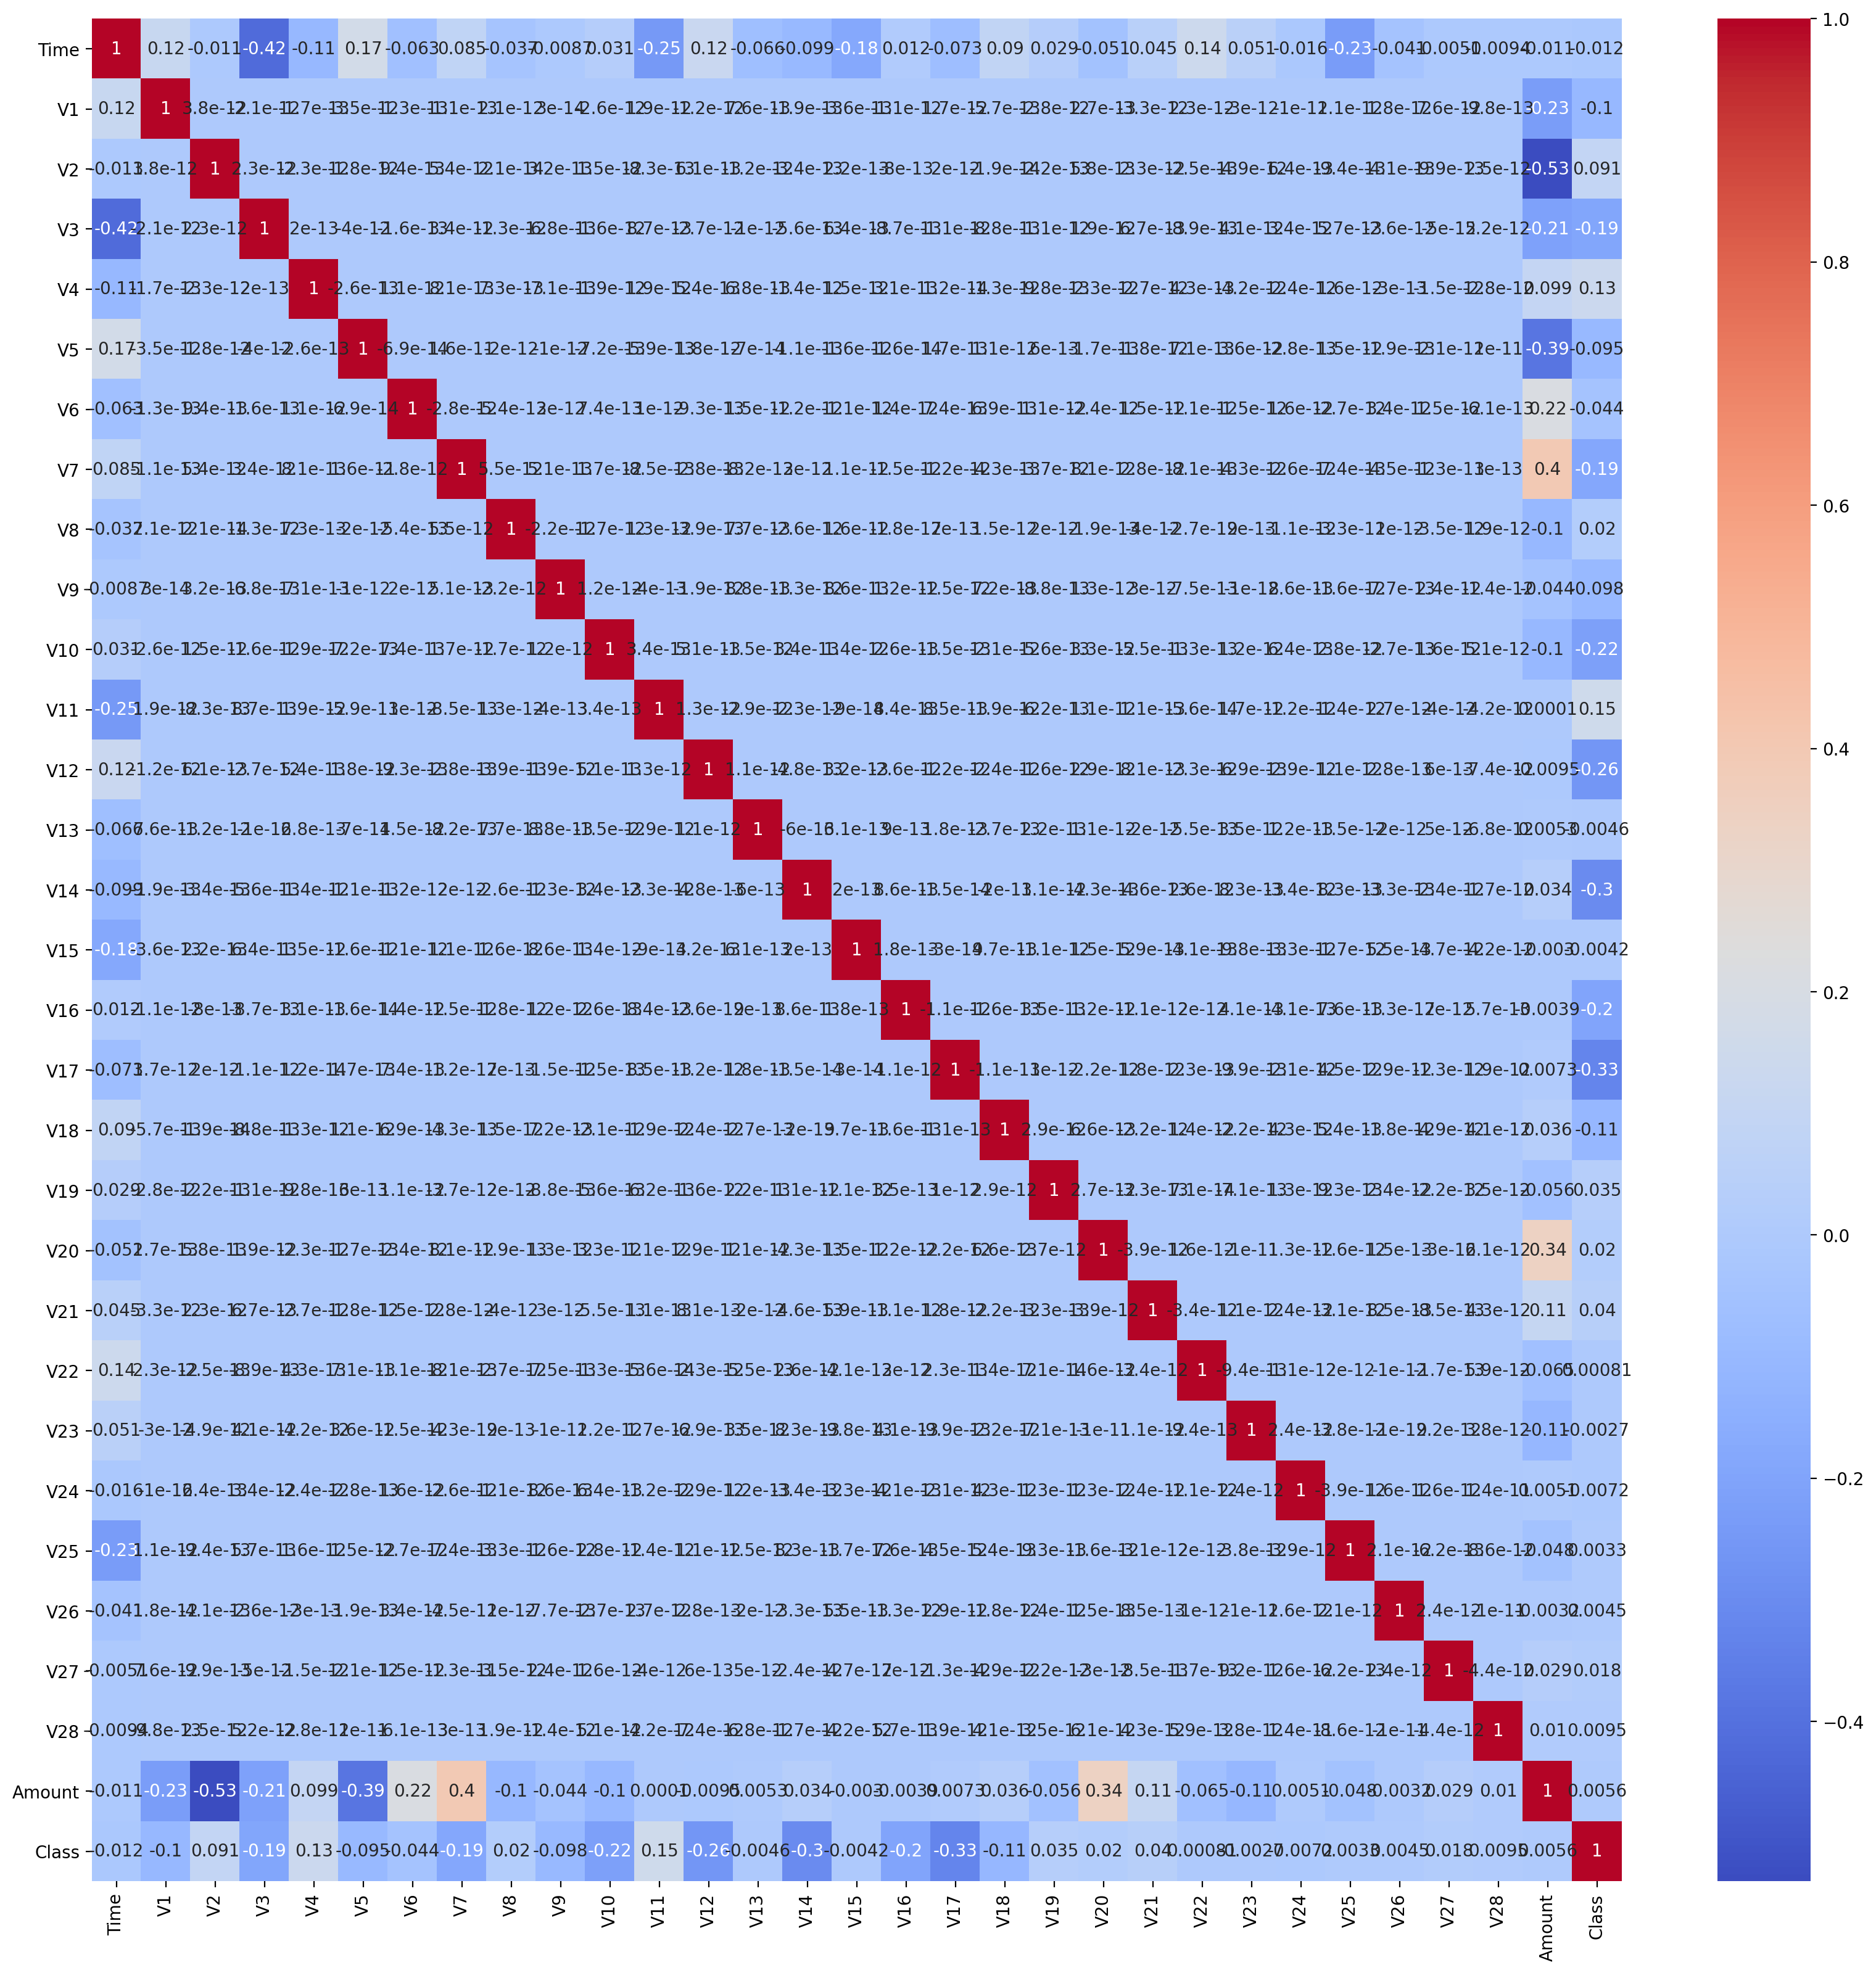

In [14]:
# Correlation part

# Heat Map
corrmat = data.corr()
top_corr_feature = corrmat.index
plt.figure(figsize=(20,20),dpi=200)
sns.heatmap(data[top_corr_feature].corr(), annot=True, cmap='coolwarm')

In [15]:
# split the data into target variable and feature variables
x=data.drop(['Class'], axis=1)
y=data.Class

In [16]:
# split the data into train and test for building the model and prediction
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=110)

In [40]:
x_train.shape, x_test.shape

((199364, 30), (85443, 30))

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [43]:
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [65]:
print('Train')
print(classification_report(y_train, y_pred_train))

print("*"*254)

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       0.72      0.60      0.65       352

    accuracy                           1.00    199364
   macro avg       0.86      0.80      0.83    199364
weighted avg       1.00      1.00      1.00    199364

**************************************************************************************************************************************************************************************************************************************************************
Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.69      0.59      0.64       140

    accuracy                           1.00     85443
   macro avg       0.85      0.80      0.82     85443
weighted avg       1.00      1.00      1.00     85443



In [69]:
print('Train')
print(confusion_matrix(y_train, y_pred_train))

print("*"*127)

print('Test')
print(confusion_matrix(y_test, y_pred_test))

Train
[[198931     81]
 [   142    210]]
*******************************************************************************************************************************
Test
[[85266    37]
 [   57    83]]


In [72]:
print(accuracy_score(y_train, y_pred_train))

print("*"*127)

print(accuracy_score(y_test, y_pred_test))

0.9988814429887041
*******************************************************************************************************************************
0.9988998513628969


# Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [67]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [73]:
print('Train')
print(classification_report(y_train, y_pred_dt_train))

print("*"*254)

print('Test')
print(classification_report(y_test, y_pred_dt_test))

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

**************************************************************************************************************************************************************************************************************************************************************
Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.79      0.79      0.79       140

    accuracy                           1.00     85443
   macro avg       0.90      0.89      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [74]:
print('Train')
print(accuracy_score(y_train, y_pred_dt_train))

print("*"*254)
print("Test")
print(accuracy_score(y_test, y_pred_dt_test))

Train
1.0
**************************************************************************************************************************************************************************************************************************************************************
Test
0.9993094811745842


In [75]:
from sklearn import tree

In [ ]:
plt.figure(figsizee=(50,50))
tree.plot_tree(dtree, filled=True)
plt.show()

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500, criterion='entropy')
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [24]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test = rfc.predict(x_test)

In [25]:
print(accuracy_score(y_train, y_pred_rfc_train))

print("*"*50)

print(accuracy_score(y_test, y_pred_rfc_test))

1.0
**************************************************
0.9996488887328394


In [26]:
print(classification_report(y_train, y_pred_rfc_train))

print("*"*50)

print(classification_report(y_test, y_pred_rfc_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199012
           1       1.00      1.00      1.00       352

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

**************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       0.99      0.79      0.88       140

    accuracy                           1.00     85443
   macro avg       1.00      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



In [37]:
confusion_matrix(y_test, y_pred_rfc_test)

array([[85302,     1],
       [   29,   111]], dtype=int64)